In [ ]:
# 3. Initialize Images and Mask Size
# ست کردن سایز و بعد تصاویر
IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS =  224, 224, 3


In [ ]:
#HSV
#    Adaptive histogram equalization
# =============================================================================

for im in glob.glob('/content/drive/MyDrive/Project/BreastCancer/Dataset/Dataset/inpouts/*.jpg'):
#resize
     img = mpimg.imread(im,-1) #cv2
     img = cv2.resize(img  , (224, 224))
     img1 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
     filename_w_ext = os.path.basename(im)
     filename, file_extension = os.path.splitext(filename_w_ext)
     plt.figure(figsize=(14, 14))
     plt.subplot(131), plt.imshow(img)
     plt.title('Original Image'), plt.xticks([]), plt.yticks([])
     plt.subplot(132), plt.imshow(img1)
     plt.title(' Original Image1'), plt.xticks([]), plt.yticks([])
#median
     median = cv2.medianBlur(img,1)
     plt.figure(figsize=(14, 14))
     plt.subplot(131), plt.imshow(img)
     plt.title('Original Image'), plt.xticks([]), plt.yticks([])
     plt.subplot(132), plt.imshow(median)
     plt.title(' medianBlur'), plt.xticks([]), plt.yticks([])
#hsv
     hsv = cv2.cvtColor(median, cv2.COLOR_BGR2HSV)# convert from BGR to HSV color space
     plt.subplot(133), plt.imshow(hsv)
     plt.title('hsv Image'), plt.xticks([]), plt.yticks([])
     plt.show()

#clahe
     clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))
     h, s, v = cv2.split(hsv)  # split on 3 different channels
     plt.figure(figsize=(14, 14))
     plt.subplot(131), plt.imshow(h, cmap='gray')
     plt.title('h'), plt.xticks([]), plt.yticks([])
     plt.subplot(132), plt.imshow(s, cmap='gray')
     plt.title('s'), plt.xticks([]), plt.yticks([])
     plt.subplot(133), plt.imshow(v, cmap='gray')
     plt.title('v'), plt.xticks([]), plt.yticks([])
     plt.show()
#apply CLAHE to the L-channel
     plt.figure(figsize=(14, 14))
     h1 = clahe.apply(h)
     s1 = clahe.apply(s)
     v1 = clahe.apply(v)
     plt.subplot(131), plt.imshow(h1)
     plt.title('h Hist'), plt.xticks([]), plt.yticks([])
     plt.subplot(132), plt.imshow(s)
     plt.title('s Hist'), plt.xticks([]), plt.yticks([])
     plt.subplot(133), plt.imshow(v)
     plt.title('v Hist'), plt.xticks([]), plt.yticks([])
     plt.show()
#lab
     lab = cv2.merge((h1,s1,v1))  # merge channels
     plt.figure(figsize=(14, 14))
     plt.subplot(131), plt.imshow(lab)
     plt.title('lab'), plt.xticks([]), plt.yticks([])
#Enhance_img
     Enhance_img= cv2.cvtColor(lab, cv2.COLOR_HSV2BGR)  # convert from LAB to BGR
     plt.subplot(132), plt.imshow(Enhance_img)
     plt.title('Enhance_img'), plt.xticks([]), plt.yticks([])
     Enhance_imgLAB= cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
     plt.subplot(133), plt.imshow(Enhance_imgLAB)
     plt.title('Enhance_imgLAB'), plt.xticks([]), plt.yticks([])
     plt.show()
     plt.figure(figsize=(14, 14))
     plt.subplot(131), plt.hist(Enhance_img.ravel(),256,[0,256])
     plt.title('Adaptive histogram equalization Enhance'), plt.xticks([]), plt.yticks([])
     plt.subplot(132), plt.hist(lab.ravel(),256,[0,256])
     plt.title('Adaptive histogram equalization Lab'), plt.xticks([]), plt.yticks([])
     plt.subplot(133), plt.hist(img1.ravel(),256,[0,256])
     plt.title('Adaptive histogram Original Image'), plt.xticks([]), plt.yticks([])
     plt.show()
     plt.figure(figsize=(14, 14))
     plt.subplot(131), plt.hist(Enhance_imgLAB.ravel(),256,[0,256])
     plt.title('Adaptive histogram equalization '), plt.xticks([]), plt.yticks([])
     plt.show()
#grayScale
# Convert the original image to grayscale
     grayScale = cv2.cvtColor( Enhance_imgLAB, cv2.COLOR_BGR2GRAY )
#morphologyEx
# Kernel
     kernel = cv2.getStructuringElement(2,(17,17))
# blackHat
     blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
     ret,thresh2 = cv2.threshold(blackhat,127,255,cv2.THRESH_BINARY)
     plt.figure(figsize=(14, 14))
     plt.subplot(131), plt.imshow(grayScale, cmap='gray')
     plt.title('grayScale'), plt.xticks([]), plt.yticks([])
     plt.subplot(132), plt.imshow(blackhat, cmap='gray')
     plt.title('blackhat'), plt.xticks([]), plt.yticks([])
     plt.subplot(133), plt.imshow(thresh2, cmap='gray')
     plt.title('thresh2'), plt.xticks([]), plt.yticks([])
     plt.show()
# inpaint
     dst = cv2.inpaint(Enhance_imgLAB,thresh2,1,cv2.INPAINT_TELEA)
     dstASLI = cv2.inpaint(Enhance_img,thresh2,1,cv2.INPAINT_TELEA)
     plt.figure(figsize=(14, 14))
     plt.subplot(231), plt.imshow(dst)
     plt.title('MORPHOLOGY-BLACKhat'), plt.xticks([]), plt.yticks([])
     plt.subplot(232), plt.imshow(dstASLI)
     plt.title('MORPHOLOGY-BLACKhat ASLI'), plt.xticks([]), plt.yticks([])
     plt.show()
#-----------------------------------------------------------------------------------
# TAGHVIAT RANG SABZ

#برای تقویت رنگ سبز تصویر را به سه کانال میشکنم و سپس کانال سبز را اچ اس وی می کنم و
#  شدت رنگ را افزایش می هم و دوباره  کانالها رابا هم ترکیبشان میکنم

# حد بالا و پایین رنگ سیز را در تصویر اعمال میکنیم و رنگ سیز را خارج می کنیم
     hsv2 = cv2.cvtColor(dst, cv2.COLOR_RGB2HSV)
     lower_green = np.array([50,50,50])
     upper_green = np.array([60,255,255])
     #آستانه گیری(cv2.inRange())
     maskg = cv2.inRange(hsv2, lower_green, upper_green)
     # and تصویر اصلی با ماسک
     #میشود (cv2.bitwise_and())
     resg = cv2.bitwise_and(Enhance_imgLAB,Enhance_imgLAB, mask= maskg)
     plt.figure(figsize=(14, 14))
     plt.subplot(131), plt.imshow(hsv2)
     plt.title('HSV2'), plt.xticks([]), plt.yticks([])
     plt.subplot(132), plt.imshow(maskg)
     plt.title('maskg'), plt.xticks([]), plt.yticks([])
     plt.subplot(133), plt.imshow(resg)
     plt.title('resg'), plt.xticks([]), plt.yticks([])
     plt.show()

#hsvgreen
     hsvgreen = cv2.cvtColor(resg, cv2.COLOR_BGR2HSV)

#split hsvgreen
     h, s, v = cv2.split(hsvgreen)  # split on 3 different channels
     plt.figure(figsize=(14, 14))
     plt.subplot(131), plt.imshow(h, cmap='gray')
     plt.title('h'), plt.xticks([]), plt.yticks([])
     plt.subplot(132), plt.imshow(s, cmap='gray')
     plt.title('s'), plt.xticks([]), plt.yticks([])
     plt.subplot(133), plt.imshow(v, cmap='gray')
     plt.title('v'), plt.xticks([]), plt.yticks([])
     plt.show()

#saturation=s val=v افزایش
     s = s* int(1.25)
     v = v* int(1.25)
     plt.figure(figsize=(14, 14))
     plt.subplot(131), plt.imshow(h, cmap='gray')
     plt.title('h'), plt.xticks([]), plt.yticks([])
     plt.subplot(132), plt.imshow(s, cmap='gray')
     plt.title('s'), plt.xticks([]), plt.yticks([])
     plt.subplot(133), plt.imshow(v, cmap='gray')
     plt.title('v'), plt.xticks([]), plt.yticks([])
     plt.show()
#MERGEHSV
     MERGEHSV = cv2.merge((h,s,v))  # merge channels
#HSVBGR رنگ سبز که باید در مراحل بعدی جایگرین کنیم
     HSVBGR = cv2.cvtColor(MERGEHSV, cv2.COLOR_HSV2BGR)
     plt.figure(figsize=(14, 14))
     plt.subplot(131), plt.imshow(hsvgreen)
     plt.title('hsvgreen'), plt.xticks([]), plt.yticks([])
     plt.subplot(132), plt.imshow(MERGEHSV)
     plt.title('MERGEHSV'), plt.xticks([]), plt.yticks([])
     plt.subplot(133), plt.imshow(HSVBGR, cmap='gray')
     plt.title('HSVBGR'), plt.xticks([]), plt.yticks([])
     plt.show()
     lower_green = np.array([50,50,50])
     upper_green = np.array([60,255,255])
     #آستانه گیری(cv2.inRange())
     maskg = cv2.inRange(HSVBGR, lower_green, upper_green)
     b2, g2, r2 = cv2.split(HSVBGR)
#split dst
     bb, gg, rr = cv2.split(dstASLI)  # split on 3 different channels
     plt.figure(figsize=(14, 14))
     plt.subplot(231), plt.imshow(bb, cmap='gray')
     plt.title('b'), plt.xticks([]), plt.yticks([])
     plt.subplot(232), plt.imshow(gg, cmap='gray')
     plt.title('g'), plt.xticks([]), plt.yticks([])
     plt.subplot(233), plt.imshow(rr, cmap='gray')
     plt.title('r'), plt.xticks([]), plt.yticks([])
     plt.show()

#merg r g b dst
#رنگ سبز را جایگزین کی کنیم
     mergRGB = cv2.merge((rr,g2,bb))
     mergBGR = cv2.merge((bb,g2,rr))
     IMAGEE = cv2.cvtColor(mergBGR, cv2.COLOR_BGR2RGB)
     plt.figure(figsize=(14, 14))
     plt.subplot(231), plt.imshow(mergRGB)
     plt.title('IMAGE RGB'), plt.xticks([]), plt.yticks([])
     plt.subplot(232), plt.imshow(mergBGR)
     plt.title('IMAGE BGR'), plt.xticks([]), plt.yticks([])
     plt.subplot(233), plt.imshow(IMAGEE)
     plt.title('IMAGEE'), plt.xticks([]), plt.yticks([])
     plt.show()
     #output_path = '/content/drive/MyDrive/Project/BreastCancer/Dataset/Dataset/Inputs_Train'
     #cv2.imwrite(os.path.join(output_path, filename +'.jpg' ),IMAGEE)

#split dst
     bb, gg, rr = cv2.split(dstASLI)  # split on 3 different channels
     plt.figure(figsize=(14, 14))
     plt.subplot(231), plt.imshow(bb, cmap='gray')
     plt.title('b'), plt.xticks([]), plt.yticks([])
     plt.subplot(232), plt.imshow(gg, cmap='gray')
     plt.title('g'), plt.xticks([]), plt.yticks([])
     plt.subplot(233), plt.imshow(rr, cmap='gray')
     plt.title('r'), plt.xticks([]), plt.yticks([])
     plt.show()

#merg r g b dst
#رنگ سبز را جایگزین کی کنیم
     mergRGB = cv2.merge((rr,maskg,bb))
     mergBGR = cv2.merge((bb,maskg,rr))
     IMAGEE = cv2.cvtColor(mergBGR, cv2.COLOR_BGR2RGB)
     plt.figure(figsize=(14, 14))
     plt.subplot(231), plt.imshow(mergRGB)
     plt.title('IMAGE RGB'), plt.xticks([]), plt.yticks([])
     plt.subplot(232), plt.imshow(mergBGR)
     plt.title('IMAGE BGR'), plt.xticks([]), plt.yticks([])
     plt.subplot(233), plt.imshow(IMAGEE)
     plt.title('IMAGEE'), plt.xticks([]), plt.yticks([])
     plt.show()
     #output_path = '/content/drive/MyDrive/Project/BreastCancer/Dataset/Dataset/Inputs_Train/seg'
     #cv2.imwrite(os.path.join(output_path, filename +'.jpg' ),IMAGEE)




# **BITWISH**

In [ ]:
# 2. Set Image Path

IMAGE_PATH = '/content/drive/MyDrive/Project/BreastCancer/Dataset/Dataset/inpouts/'
IMAGE_MASK_PATH = '/content/drive/MyDrive/Project/BreastCancer/Dataset/Dataset/mask/'


In [ ]:
# 3. Get Images and Set Some Parameters, One_Hot Encoding Technique

IMG_HEIGHT = 720
IMG_WIDTH = 1128
IMG_CHANNELS = 3

In [ ]:
print('PNASNet')

PNASNet


In [ ]:
from sklearn import datasets
bcd = datasets.load_breast_cancer()
x = bcd.data
y = bcd.target

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(x_train, y_train)
y_prediction = classifier.predict(x_test)
#y_prediction = classifier.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(confusion_matrix(y_test, y_prediction, [0, 1]))
print(classification_report(y_test, y_prediction))

Automatically created module for IPython interactive environment
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


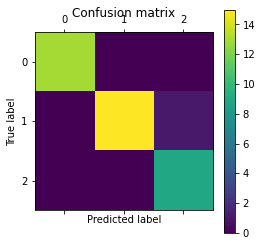

In [ ]:
print(__doc__)

from sklearn import svm, datasets
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier
classifier = svm.SVC(kernel='linear')
y_pred = classifier.fit(X_train, y_train).predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

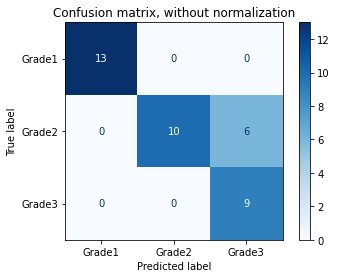

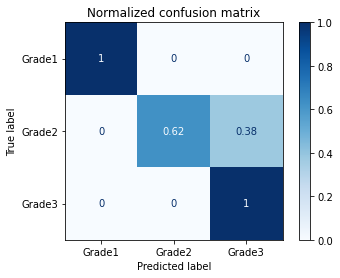

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels= ['Grade1', 'Grade2', 'Grade3'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

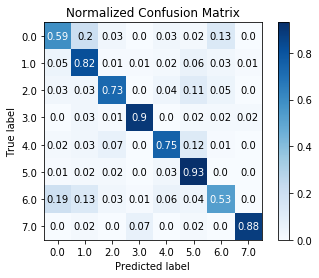

In [ ]:
from sklearn.model_selection import cross_val_predict
class_names = ['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV','SCC', 'VASC']
y_pred= my_vot_model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

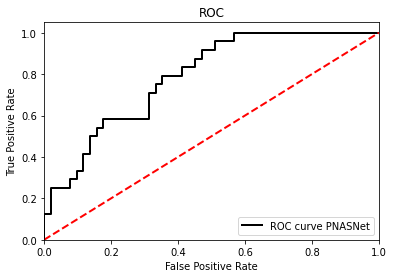

In [ ]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="black",
    lw=lw,
    label="ROC curve PNASNet" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="red", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

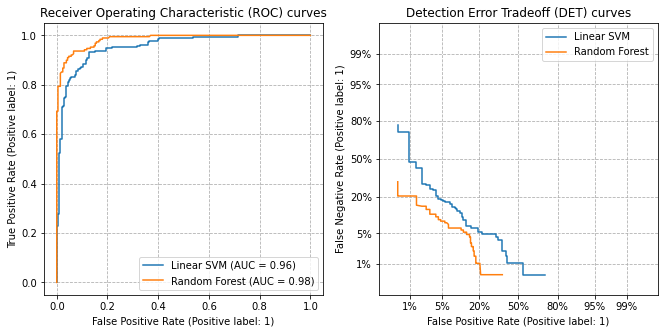

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

N_SAMPLES = 1000

classifiers = {
    "Linear SVM": make_pipeline(StandardScaler(), LinearSVC(C=0.025)),
    "Random Forest": RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1
    ),
}

X, y = make_classification(
    n_samples=N_SAMPLES,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# prepare plots
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

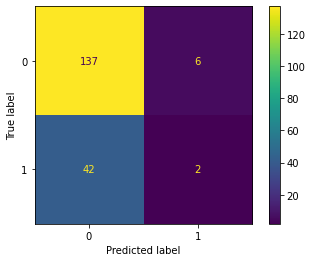

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()


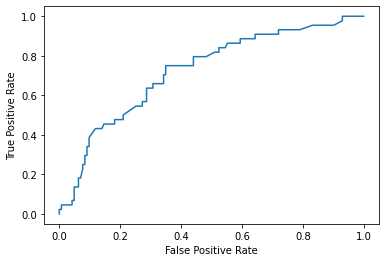

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

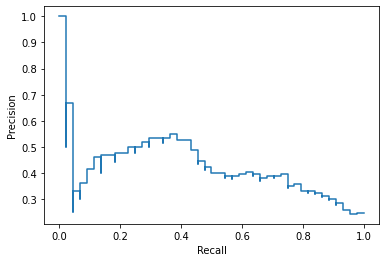

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

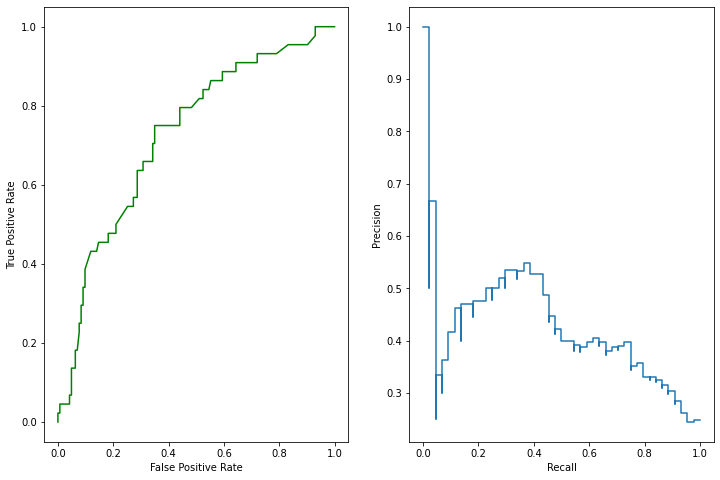

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1, color='green')
pr_display.plot(ax=ax2)
plt.show()

In [ ]:
print('ROC SENet')
print('ROC VGG-19')
print('ROC PNASNet')
print('ROC ENSEMBLE')

ROC SENet
ROC VGG-19
ROC PNASNet
ROC ENSEMBLE
